<a href="https://colab.research.google.com/github/ShoSato-047/R_review/blob/main/ShoSato_Activity_1_(2025)_MLR_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data
For this problem we will reconsider the Kentucky Derby data

In [34]:
derby_data <- read.csv('https://www.dropbox.com/s/t1hsmyan1mpp77y/KentuckyDerbyClean.csv?dl=1')

In [35]:
head(derby_data)

,Year,Winner,Jockey,Track,Speed,Fast
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,2024,Mystik Dan,Brian Hernandez Jr.,Fast,53.51062,Fast
2,2023,Mage,Javier Castellano,Fast,54.28971,Fast
3,2022,Rich Strike,Sonny Leon,Fast,53.82921,Fast
4,2021,Mandaloun,Florent Geroux,Fast,54.53644,Fast
5,2020,Authentic,John Velazquez,Fast,54.72183,Fast
6,2019,Country House,Flavien Prat,Sloppy,53.25587,Not fast


Recall the following quadratic interaction model:

$$E(Speed_i) = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \beta_3 U_i + \beta_4 X_{1i}\cdot U_i + \beta_5 X_{2i}\cdot U_i,$$

where:
$$X_{1i}=Year_i,$$

$$X_{2i}=Year_i^2,$$

$$U_i = \begin{cases} 0 & Fast_i = No \\
1 & Fast_i = Yes \end{cases}
$$

Fitting this model and plotting the fit:

In [36]:
#More succinct specification of the same model:
quadratic_interaction_model <- lm(Speed~Year + I(Year^2) + Year*Fast + I(Year^2)*Fast, data = derby_data)
round(summary(quadratic_interaction_model)$coef,5)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1538.02429,151.71834,-10.13737,0.00000
Year,1.60354,0.15577,10.29451,0.00000
I(Year^2),-0.00040,0.00004,-10.10170,0.00000
FastNot fast,278.61628,315.25280,0.88379,0.37828
Year:FastNot fast,-0.29254,0.32330,-0.90485,0.36706
I(Year^2):FastNot fast,0.00008,0.00008,0.92240,0.35786


In [37]:
head(quadratic_interaction_model$fitted.values)

1        2        3        4        5        6 
53.72166 53.75192 53.78137 53.81002 53.83786 53.39189

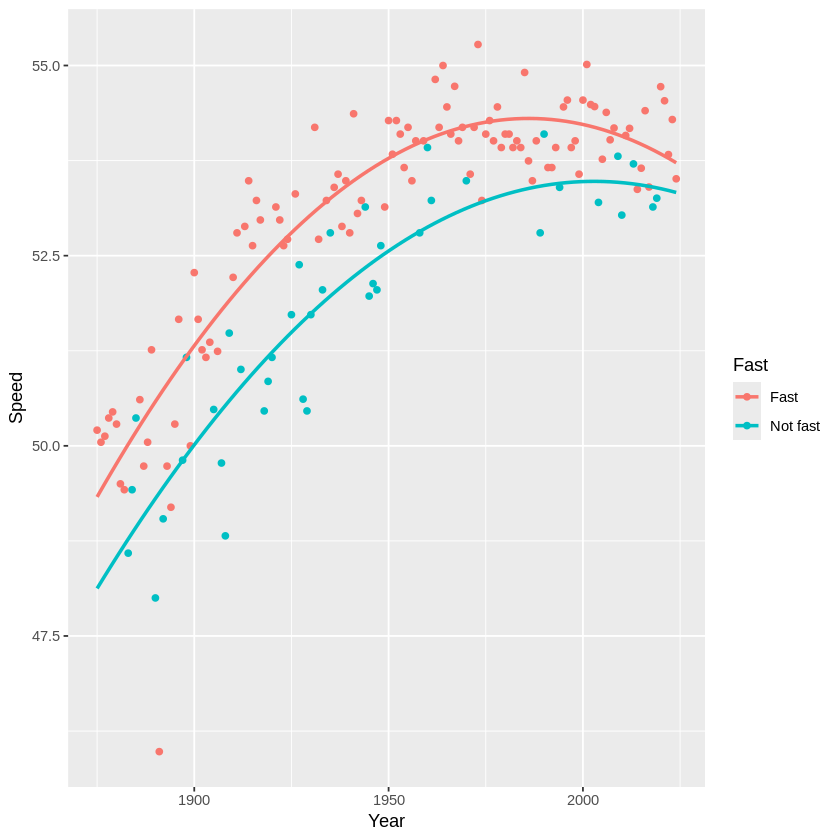

In [38]:
library(ggplot2)
ggplot(data = derby_data) +
  geom_point(aes(x = Year, y = Speed, col = Fast)) +
    geom_smooth(aes(x = Year, y = Speed, col = Fast), method = 'lm', formula = y~poly(x,2), se = FALSE, fullrange = TRUE)

Recall the following quadratic interaction model:

$$E(Speed_i) = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \beta_3 U_i + \beta_4 X_{1i}\cdot U_i + \beta_5 X_{2i}\cdot U_i,$$

where:
$$X_{1i}=Year_i,$$

$$X_{2i}=Year_i^2,$$

$$U_i = \begin{cases} 0 & Fast_i = No \\
1 & Fast_i = Yes \end{cases}
$$

In [41]:
quadratic_interaction_model$coefficients

(Intercept)                   Year              I(Year^2) 
         -1.538024e+03           1.603538e+00          -4.037066e-04 
          FastNot fast      Year:FastNot fast I(Year^2):FastNot fast 
          2.786163e+02          -2.925412e-01           7.642880e-05

In [65]:
#More succinct specification of the same model:
quadratic_interaction_model <- lm(Speed~Year + I(Year^2) + Year*Fast + I(Year^2)*Fast, data = derby_data)
round(summary(quadratic_interaction_model)$coef,12)

# rounding to 5 makes the number big because 1949^2 is a really big number.
# round to 12

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.538024e+03,1.517183e+02,-10.1373659,0.0000000
Year,1.603538e+00,1.557663e-01,10.2945119,0.0000000
I(Year^2),-4.037066e-04,3.996424e-05,-10.1016952,0.0000000
FastNot fast,2.786163e+02,3.152528e+02,0.8837869,0.3782844
Year:FastNot fast,-2.925412e-01,3.233034e-01,-0.9048505,0.3670560
I(Year^2):FastNot fast,7.642880e-05,8.285865e-05,0.9223997,0.3578630


In [66]:
# 1949 Fast
# Fast = 0, Not Fast = 1
# use "ctr + shift + l"

B0 = round(quadratic_interaction_model$coefficients[1],12)
B1 = round(quadratic_interaction_model$coefficients[2],12)
B2 = round(quadratic_interaction_model$coefficients[3],12)
B3 = round(quadratic_interaction_model$coefficients[4],12)
B4 = round(quadratic_interaction_model$coefficients[5],12)
B5 = round(quadratic_interaction_model$coefficients[6],12)

X1 = 1949
X2 = 1949^2

Ui = 0

Fast_1949 = B0 + B1*X1 + B2*X2 + B3*Ui + B4*X1*Ui + B5*X2*Ui
Fast_1949

(Intercept) 
   53.75078

In [69]:
# 1949 Not Fast
# Fast = 0, Not Fast = 1
# use "ctr + shift + l"

B0 = round(quadratic_interaction_model$coefficients[1],12)
B1 = round(quadratic_interaction_model$coefficients[2],12)
B2 = round(quadratic_interaction_model$coefficients[3],12)
B3 = round(quadratic_interaction_model$coefficients[4],12)
B4 = round(quadratic_interaction_model$coefficients[5],12)
B5 = round(quadratic_interaction_model$coefficients[6],12)

X1 = 1949
X2 = 1949^2

Ui = 1

Not_Fast_1949 = B0 + B1*X1 + B2*X2 + B3*Ui + B4*X1*Ui + B5*X2*Ui
Not_Fast_1949

(Intercept) 
   52.52679

In [63]:
# 2024 Fast
# Fast = 0, Not Fast = 1
# use "ctr + shift + l"

B0 = round(quadratic_interaction_model$coefficients[1],12)
B1 = round(quadratic_interaction_model$coefficients[2],12)
B2 = round(quadratic_interaction_model$coefficients[3],12)
B3 = round(quadratic_interaction_model$coefficients[4],12)
B4 = round(quadratic_interaction_model$coefficients[5],12)
B5 = round(quadratic_interaction_model$coefficients[6],12)

X1 = 2024
X2 = 2024^2

Ui = 0

Fast_2024 = B0 + B1*X1 + B2*X2 + B3*Ui + B4*X1*Ui + B5*X2*Ui
Fast_2024

(Intercept) 
   53.72166

In [64]:
# 2024 Not Fast
# Fast = 0, Not Fast = 1
# use "ctr + shift + l"

B0 = round(quadratic_interaction_model$coefficients[1],12)
B1 = round(quadratic_interaction_model$coefficients[2],12)
B2 = round(quadratic_interaction_model$coefficients[3],12)
B3 = round(quadratic_interaction_model$coefficients[4],12)
B4 = round(quadratic_interaction_model$coefficients[5],12)
B5 = round(quadratic_interaction_model$coefficients[6],12)

X1 = 2024
X2 = 2024^2

Ui = 1

Not_Fast_2024 = B0 + B1*X1 + B2*X2 + B3*Ui + B4*X1*Ui + B5*X2*Ui
Not_Fast_2024

(Intercept) 
   53.33095

# Q1

Use the model coefficients to *manually* contrast the fitted speed in 1949 between fast and not-fast tracks.  Then do the same to contrast the fitted speed in 2024.  How has the speed gap between fast and not-fast tracks changed over time, if at all?

In [70]:
Fast_1949 - Not_Fast_1949

(Intercept) 
   1.223991

In [71]:
Fast_2024 - Not_Fast_2024

(Intercept) 
  0.3907089

In [73]:
# Q1 Answer:
# The speed gap is getting smaller over time (1949: 1.22 -> 2024: 0.39).

# Q2
Use `emmeans` to find the fitted model values in 1949 for fast and not fast tracks, and in 2022 for fast and not fast tracks.  Use default (constant variance) standard errors, for now.

In [47]:
install.packages('emmeans')
library(emmeans)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [74]:
emmeans_object <- emmeans(quadratic_interaction_model, specs = ~Fast|Year, at = list(Year = c(1949, 2024)))
emmeans_object

Year = 1949:
 Fast     emmean    SE  df lower.CL upper.CL
 Fast      53.75 0.103 144    53.55    53.95
 Not fast  52.53 0.172 144    52.19    52.87

Year = 2024:
 Fast     emmean    SE  df lower.CL upper.CL
 Fast      53.72 0.198 144    53.33    54.11
 Not fast  53.33 0.360 144    52.62    54.04

Confidence level used: 0.95 

In [75]:
# Q2 Answer:

# The fitted model value in 1949 Fast:
# 53.75

# The fitted model value in 1949 Not Fast:
# 52.53

# The fitted model value in 2024 Fast:
# 53.72

# The fitted model value in 2024 Not Fast:
# 53.33

# Q3

Characterize the statististical differences between the average speed of fast and not-fast tracks in 1949, and in 2022.  Include p-values and 95% CI in your discussion.  

In [76]:
contrast(emmeans_object, method = 'pairwise')

Year = 1949:
 contrast        estimate    SE  df t.ratio p.value
 Fast - Not fast    1.224 0.200 144   6.106  <.0001

Year = 2024:
 contrast        estimate    SE  df t.ratio p.value
 Fast - Not fast    0.391 0.411 144   0.950  0.3439


In [77]:
confint(contrast(emmeans_object, method = 'pairwise'))

,contrast,Year,estimate,SE,df,lower.CL,upper.CL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Fast - Not fast,1949,1.2239897,0.2004612,144,0.8277631,1.620216
2,Fast - Not fast,2024,0.3907076,0.4114433,144,-0.4225410,1.203956


In [52]:
# Q3 Answer:
# Among horses in 1949, the average spped was 1.2240 feet/s faster in the fast track group than in the not-fast track group.
# This is a statistically significant difference in the average speed comparing horses with fast and not-fast tracks (p-value < 0.0001; 95% CI: 0.8278, 1.6202)

# Among horses in 2024, the average spped was 0.3907 feet/s faster in the fast track group than in the not-fast track group.
# This is NOT a statistically significant difference in the average speed comparing horses with fast and not-fast tracks (p-value < 0.3439; 95% CI: -0.4225, 1.2040)

# Q4

Do default (constant variance) standard errors appear appropriate or should we have used robust sandwich standard errors?  Justify your answer with appropriate plot(s).

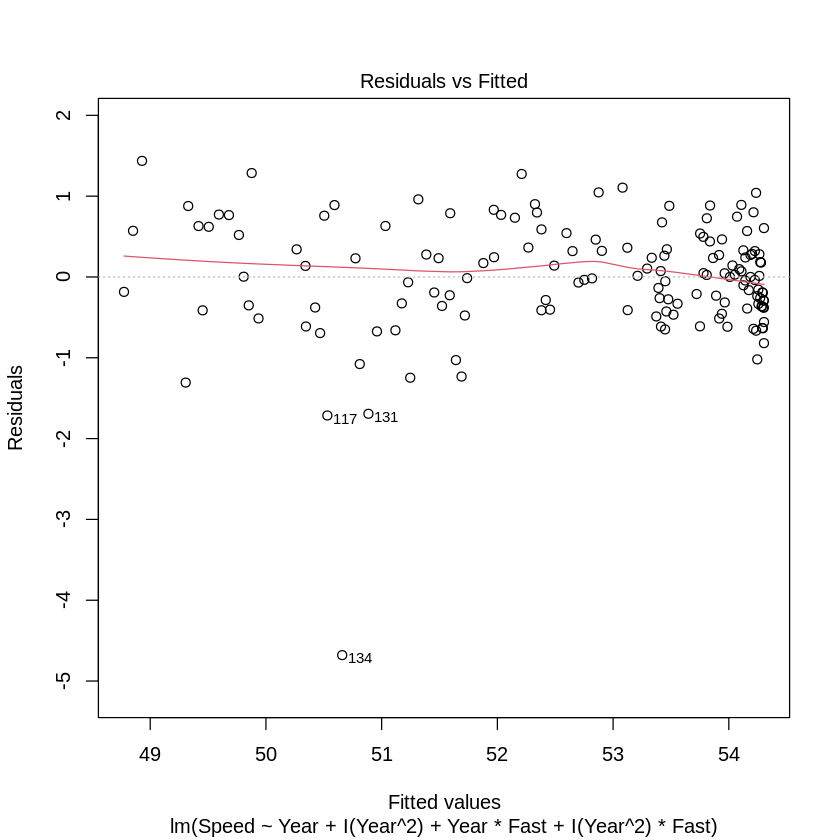

In [54]:
plot(quadratic_interaction_model, which = 1)

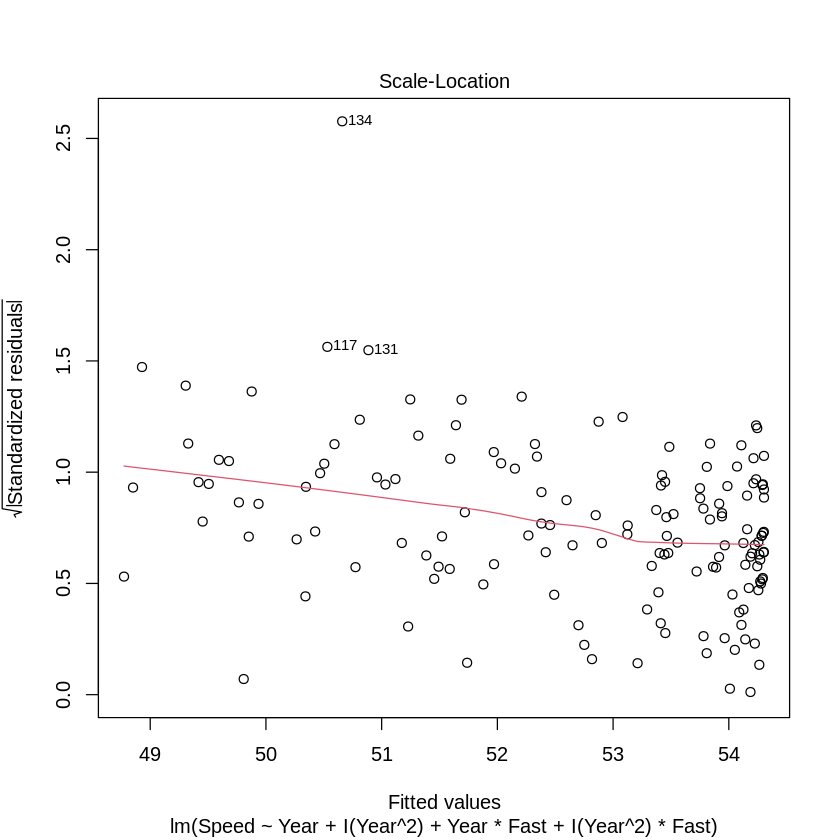

In [55]:
plot(quadratic_interaction_model, which = 3)

In [56]:
# Q4 Answer:

# The fit quality looks okay. The smooth line is flat.
# Constant variance is not bad. No obvious megaphon shape in the first plot.

# However, scale location plot (2nd plot) shows slight variability of points.
# This indicates a slight issue with constant variance (heteroskedasticity may be present).

# Q5

Are your results very sensitive to choice of standard error (default or robust sandwich SEs)?  Re-run the analysis using robust sandwich SEs and compare the contrast inference to your results from Q3.

In [ ]:
# Note:
# Heteroskedasticity occurs when the variability of the error term (or residuals) in a regression model is not constant across all levels of the independent variable(s).
# In other words, the spread of the residuals changes depending on the value of one or more predictors.
# Heteroskedasticity has a direct impact on the calculation of standard errors and can lead to issues.

In [78]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [79]:
install.packages('sandwich')
library(sandwich)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [94]:
# From Q3 with default standard errors (constant variance)
(
  quadratic_interaction_model
    %>% emmeans(specs = ~Fast|Year, at = list(Year = c(1949, 2024)))
    %>% contrast(method = 'pairwise')
    #%>% confint
)

Year = 1949:
 contrast        estimate    SE  df t.ratio p.value
 Fast - Not fast    1.224 0.200 144   6.106  <.0001

Year = 2024:
 contrast        estimate    SE  df t.ratio p.value
 Fast - Not fast    0.391 0.411 144   0.950  0.3439


In [91]:
# specs = ~Fast|Year: calculate the EMMs for Fast, grouped by each level of Year
# *****vcov. = vcovHC: adjusts for potential heteroskedasticity in the model*****
# contrast() = compute differences between estimated marginal means (EMMs) from the emmeans

(
  quadratic_interaction_model
    %>% emmeans(specs = ~Fast|Year, at = list(Year = c(1949, 2024)), vcov.=vcovHC)
    %>% contrast(method = 'pairwise')
    #%>% confint
)

Year = 1949:
 contrast        estimate    SE  df t.ratio p.value
 Fast - Not fast    1.224 0.176 144   6.938  <.0001

Year = 2024:
 contrast        estimate    SE  df t.ratio p.value
 Fast - Not fast    0.391 0.260 144   1.506  0.1344


In [ ]:
# Q5 Answer:

# No, the results are NOT sensitive to choice of standard errors.
# I do not see a big difference in p-value and t-ratio.

# Q6

Now characterize the change in modeled speed comparing 2024 to 1949, separately for fast and not-fast tracks.  This means:
* Find and interpret a modeled contrast;
* Determine whether the contrast is statistically significant with relevant p-value and 95% confidence interval.

Use whichever standard error method you deem most appropriate.

In [84]:
# Just switch the order of Year and Fast in specs
(
  quadratic_interaction_model
    %>% emmeans(specs = ~Year|Fast, at = list(Year = c(1949, 2024)), vcov. = vcovHC)
    %>% contrast(method = 'pairwise')
    %>% confint
)

,contrast,Fast,estimate,SE,df,lower.CL,upper.CL
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Year1949 - Year2024,Fast,0.02912736,0.1873994,144,-0.3412817,0.3995364
2,Year1949 - Year2024,Not fast,-0.80415474,0.3221338,144,-1.4408763,-0.1674332


In [ ]:
# Q6 Answer:

# Among horses run in Fast track, the average spped was 0.0291 feet/s FASTER in the 1949 group than in the 2024 group.
# This is NOT a statistically significant difference in the average speed comparing horses run in Fast tracks in 1949 and 2024.
# (p-value = 0.8767; 95% CI: -0.3413, 0.3995)

# Among horses run in Not Fast track, the average spped was 0.8042 feet/s SLOWER in the 1949 group than in the 2024 group.
# This is a statistically significant difference in the average speed comparing horses run in Not Fast tracks in 1949 and 2024.
# (p-value = 0.0137; 95% CI: -1.4409, -0.1674)